## CRISP-DM 기반의 데이터 분석
- 출처 : https://ride.capitalbikeshare.com/system-data
- Maryland 주 Washington D.C에서 자전거 공유 회사가 모은 데이터셋

In [1]:
import pandas as pd # 모듈 불러오기

In [2]:
df = pd.read_csv("test1.csv") # 데이터셋 불러오기
print(df.shape) 
df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Business Understanding
- 이 분야의 종사자들은 무엇을 궁금해할까
- 공유 자전거 서비스 업계의 도메인을 이해 
- 임대 서비스 : 자전거라는 상품을 대여해준다. 
- 대여되지 않는 자전거 대수가 적을수록 사업이 잘 된다고 판단 
- 분석 방향성 : 수요량 예측(얼만큼 쓰는지가 궁금하다.), 서비스 이용량 증감 파악

# Data Understanding
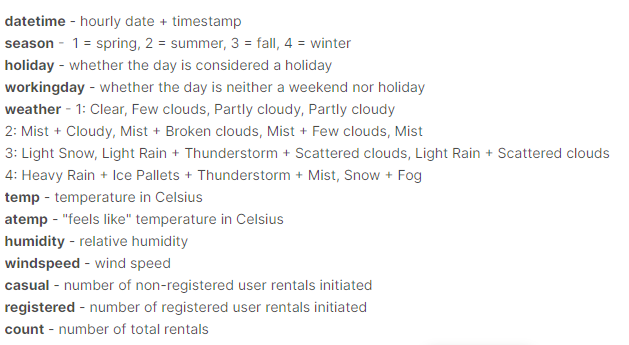


# EDA, 모델링을 용이하게하기 위한 작업 수행

In [3]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
df.T # 데이터셋 전치

,0,1,2,3,4,5,6,7,8,9,...,10876,10877,10878,10879,10880,10881,10882,10883,10884,10885
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00,2011-01-01 05:00:00,2011-01-01 06:00:00,2011-01-01 07:00:00,2011-01-01 08:00:00,2011-01-01 09:00:00,...,2012-12-19 14:00:00,2012-12-19 15:00:00,2012-12-19 16:00:00,2012-12-19 17:00:00,2012-12-19 18:00:00,2012-12-19 19:00:00,2012-12-19 20:00:00,2012-12-19 21:00:00,2012-12-19 22:00:00,2012-12-19 23:00:00
season,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
holiday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
workingday,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
weather,1,1,1,1,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84,9.84,9.02,8.2,9.84,13.12,...,17.22,17.22,17.22,16.4,15.58,15.58,14.76,13.94,13.94,13.12
atemp,14.395,13.635,13.635,14.395,14.395,12.88,13.635,12.88,14.395,17.425,...,21.21,21.21,21.21,20.455,19.695,19.695,17.425,15.91,17.425,16.665
humidity,81,80,80,75,75,75,80,86,75,76,...,50,50,50,50,50,50,57,61,61,66
windspeed,0.0,0.0,0.0,0.0,0.0,6.0032,0.0,0.0,0.0,0.0,...,12.998,19.0012,23.9994,26.0027,23.9994,26.0027,15.0013,15.0013,6.0032,8.9981
casual,3,8,5,3,0,0,2,1,1,8,...,33,28,37,26,23,7,10,4,12,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# datetime type 연습

sample = '2011-01-01 00:00:00'

da = sample.split()
date = da[0].split('-')
time = da[1].split(':')

year = date[0]
month = date[1]
day = date[2]

hour = time[0]
minute = time[1]
sec = time[2]

print(year, month, day, hour, minute, sec)

2011 01 01 00 00 00


In [7]:
# lambda 함수를 활용한 datetime 데이터를 년 월 일 시간으로 분류하는 작업

df['year'] = df['datetime'].apply(lambda x : int(x[:4]))
df['month'] = df['datetime'].apply(lambda x : int(x.split()[0].split('-')[1]))
df['day'] = df['datetime'].apply(lambda x : int(x.split()[0].split('-')[2]))
df['hour'] = df['datetime'].apply(lambda x : int(x.split()[1].split(':')[0]))
df['minute'] = df['datetime'].apply(lambda x : int(x.split()[1].split(':')[1]))
df['sec'] = df['datetime'].apply(lambda x : int(x.split()[1].split(':')[2]))
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [8]:
parsed = pd.to_datetime(sample)
parsed.dayofweek # 요일을 숫자로 나타내어준다. 

# 0(mon)  ~ 6(sun)

5

In [9]:
df['dayofweek'] = df['datetime'].apply(lambda x : pd.to_datetime(x).dayofweek)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,sec,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [10]:
set(df['dayofweek']) # 속성정보를 보여줌

{0, 1, 2, 3, 4, 5, 6}

In [11]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'sec', 'dayofweek'],
      dtype='object')

In [12]:
interested = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'sec', 'dayofweek']        #필요한 변수만 모아서 리스트에 등록
df[interested].to_csv('test1_modify.csv', index = False)                   #다음번에도 쉽게 사용하기 위해 새로운 csv 파일로 만들기

df = pd.read_csv('test1_modify.csv')        # 새로운 파일을 불러오기
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,sec,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


# EDA



In [13]:
import seaborn as sns # 시각화로 탐색적 분석을 위해 모듈 불러오기

In [14]:
# sns.scatterplot(data = df1, x= 'registered', y = 'casual', hue = 'workingday')
# registered의 이용량이 상대적으로 더 많다. 

# 일하는 날에는 등록회원이 많이 이용하고
# 일하지 않는 날은 비등록 회원이 많이 이용함
# 등록/ 비등록 회원의 사용하는 빈도의 차이는 일하는 날의 유무이다.


# 데이터를 표현 -> 문장을 잘 도출할 수 있어야 하며 -> 의미가 있어야한다. 

In [15]:
# 등록한 사람과 비등록 사람이 서비스 이용 목적이 다를 것으로 예상된다. 
# 이 예상을 뒷받침 할 수 있는 그래프를 그려보자.

<AxesSubplot:xlabel='season', ylabel='count'>

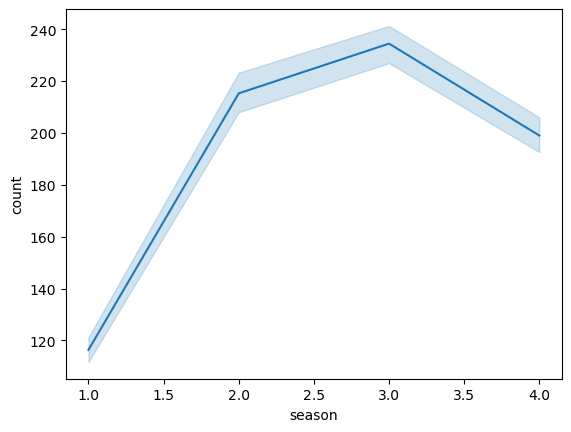

In [16]:
#sns.lineplot(data = df, x = 'month', y = 'registered') 
sns.lineplot(data = df, x= 'season', y = 'count')

# lineplot 으로 인사이트를 도출해보자.

<AxesSubplot:xlabel='month', ylabel='registered'>

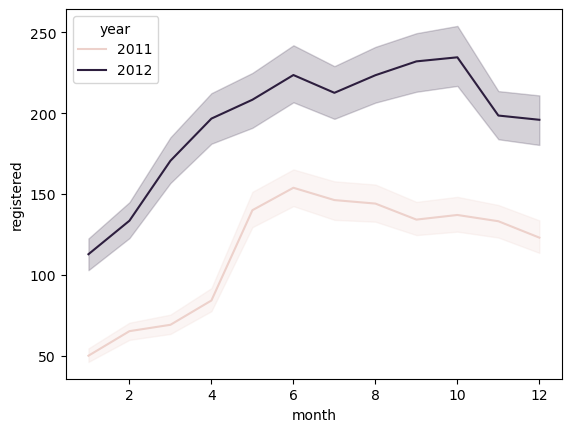

In [17]:
# Q) 월별 등록 / 비등록 회원의 사용량의 편차는 어떠한가?
sns.lineplot(data = df, x= "month", y = "registered", hue = 'year')

<AxesSubplot:xlabel='month', ylabel='casual'>

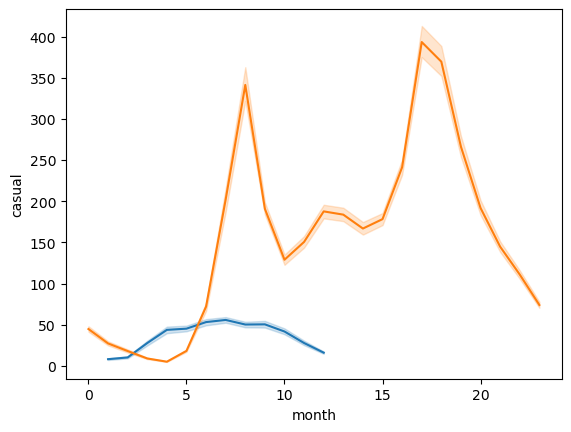

In [18]:
sns.lineplot(data = df, x= "month", y = "casual")
sns.lineplot(data = df, x = 'hour', y = 'registered')

<AxesSubplot:xlabel='hour', ylabel='registered'>

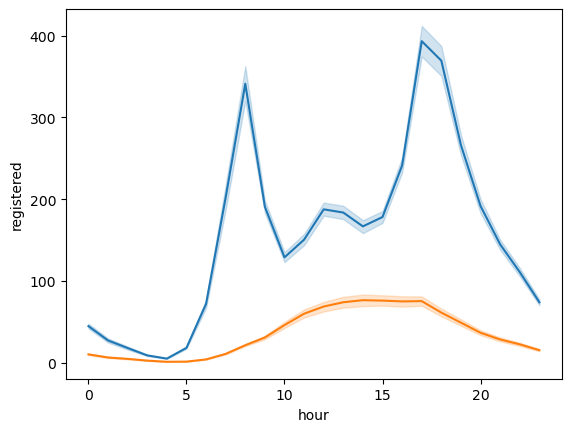

In [19]:
# Q) 시간에 따른 패턴을 확인해보자.
sns.lineplot(data = df, x = 'hour', y = 'registered')
sns.lineplot(data = df, x = 'hour', y = 'casual')

# 같은 셀에 코딩을 하면 한 그래프 안에 나오게 된다.

<AxesSubplot:xlabel='hour', ylabel='casual'>

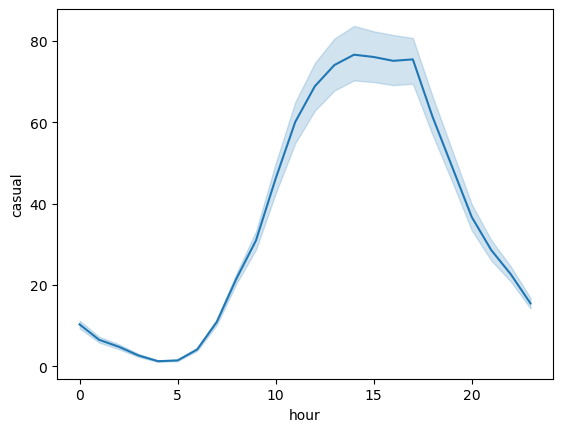

In [20]:
sns.lineplot(data = df, x = 'hour', y = 'casual')

<AxesSubplot:xlabel='hour', ylabel='registered'>

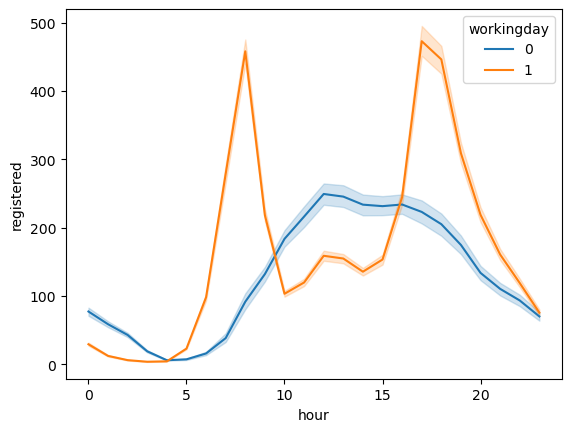

In [21]:
# Q) 시간 별 workingday에 유무에 따른 차이가 있나? 위에 질문 연계 

sns.lineplot(data = df, x = 'hour', y = 'registered', hue = "workingday")

<AxesSubplot:xlabel='hour', ylabel='casual'>

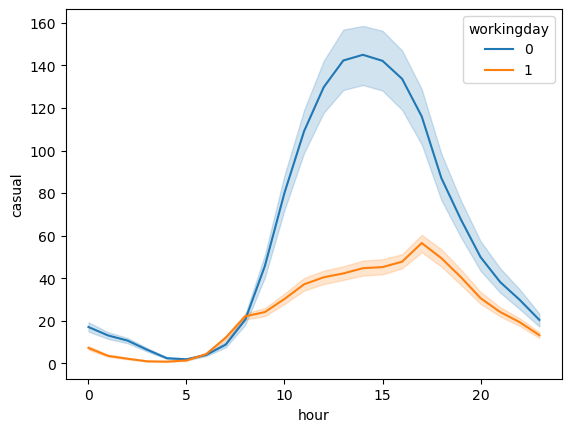

In [22]:
sns.lineplot(data = df, x = 'hour', y = 'casual', hue = "workingday")